#### **An outline of the Basic Statistical Methods tested**

- T-test: Compares means of a continuous variable between two groups (e.g., churn vs. non-churn). Assumes normality; null hypothesis: means are equal.
- Mann-Whitney U Test: Non-parametric alternative to t-test; compares distributions (ranks) between groups without assuming normality. Null: distributions are identical.
- Cohen's d: Effect size measure for mean differences; d around 0.2=small, 0.5=medium, 0.8=large. Negative value indicates the first group's mean is lower.
- Chi-square Test: Tests association between two categorical variables (e.g., income category vs. churn). Null: variables are independent. Uses a contingency table of counts; degrees of freedom (dof) = (rows-1)*(columns-1).
- P-value: Probability of observing results (or more extreme) assuming null hypothesis is true. Low p (e.g., <0.05) suggests reject null (evidence of difference/association). Here, p=0.000000 indicates extremely strong evidence.

#### 1️⃣ Income Category vs. Churn
Hypothesis:

H₀: Income category is independent of churn status.

H₁: Income category is associated with churn status.

In [ ]:
# --- Statistical Test ---
import pandas as pd
from scipy.stats import chi2_contingency
import plotly.express as px

# Load data

try:
    df = pd.read_csv("/mnt/data/cleaned_bank_churn.csv")
except FileNotFoundError:
    df = pd.read_csv("../data/cleaned_bank_churn.csv")  # code refactored to handle file not found error using Copilot

# Recreate Income Category if one-hot encoded
income_cols = [c for c in df.columns if c.startswith('Income_Category_')]
if income_cols:
    df['Income_Category'] = df[income_cols].idxmax(axis=1).str.replace('Income_Category_', '')

# Map churn column
df['Attrition_Flag'] = df['Churn'].map({1: 'Attrited Customer', 0: 'Existing Customer'})

# Chi-square test
cont_table = pd.crosstab(df['Income_Category'], df['Attrition_Flag'])
chi2, p, dof, exp = chi2_contingency(cont_table)

print("Chi-square test for Income Category vs Churn")
print(f"Chi2 = {chi2:.3f}, p = {p:.6f}, dof = {dof}")
print("Contingency Table:")
print(cont_table)


Chi-square test for Income Category vs Churn
Chi2 = 10.990, p = 0.026673, dof = 4
Contingency Table:
Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$40K - $60K                    397               2120
$60K - $80K                    189               1213
$80K - $120K                   242               1293
Less than $40K                 612               2949
Unknown                        187                925


In [3]:
# --- Plotly Visual ---
plot_df = df.groupby(['Income_Category','Attrition_Flag']).size().reset_index(name='count')
fig = px.bar(plot_df, x='Income_Category', y='count', color='Attrition_Flag',
             title='Churn by Income Category', barmode='stack')
fig.update_layout(xaxis_title="Income Category", yaxis_title="Customer Count", xaxis_tickangle=-45)
fig.show()


In [ ]:
# save plotly visual to outputs folder

import os

os.makedirs("data/outputs", exist_ok=True)
fig.write_html("data/outputs/income_category_vs_churn.html")

#### 2️⃣ Total_Trans_Amt vs. Churn
Hypothesis:

H₀: Mean total transaction amount is the same for churned and retained customers.

H₁: Mean total transaction amount differs between churned and retained customers

In [8]:
# --- Statistical Test ---
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np

col = 'Total_Trans_Amt'
churned = df[df['Attrition_Flag']=='Attrited Customer'][col]
retained = df[df['Attrition_Flag']=='Existing Customer'][col]

# t-test (Welch) + Mann-Whitney
t_stat, p_val = ttest_ind(churned, retained, equal_var=False)
mw_stat, mw_p = mannwhitneyu(churned, retained, alternative='two-sided')

# Cohen's d
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / (nx+ny-2))
    return (np.mean(x) - np.mean(y)) / pooled_std

d = cohens_d(churned, retained)

print(f"T-test t={t_stat:.3f}, p={p_val:.6f}")
print(f"Mann-Whitney p={mw_p:.6f}")
print(f"Cohen's d = {d:.3f}")


T-test t=-22.686, p=0.000000
Mann-Whitney p=0.000000
Cohen's d = -0.466


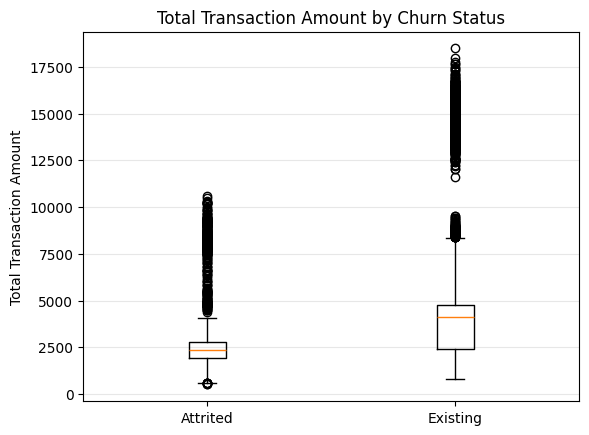

In [9]:
# --- Matplotlib Visual ---
import matplotlib.pyplot as plt

plt.boxplot([churned, retained], labels=['Attrited', 'Existing'])
plt.ylabel("Total Transaction Amount")
plt.title("Total Transaction Amount by Churn Status")
plt.grid(axis='y', alpha=0.3)
plt.show()

#### 3️⃣ Total_Relationship_Count vs. Churn
Hypothesis:

H₀: Mean total relationship count is the same for churned and retained customers.

H₁: Mean total relationship count differs between churned and retained customers.

In [ ]:
# --- Statistical Test ---

col = 'Total_Relationship_Count'
churned = df[df['Attrition_Flag']=='Attrited Customer'][col]
retained = df[df['Attrition_Flag']=='Existing Customer'][col]

t_stat, p_val = ttest_ind(churned, retained, equal_var=False)
mw_stat, mw_p = mannwhitneyu(churned, retained, alternative='two-sided')
d = cohens_d(churned, retained)

print(f"T-test t={t_stat:.3f}, p={p_val:.6f}")
print(f"Mann-Whitney p={mw_p:.6f}")
print(f"Cohen's d = {d:.3f}")


T-test t=-14.944, p=0.000000
Mann-Whitney p=0.000000
Cohen's d = -0.413


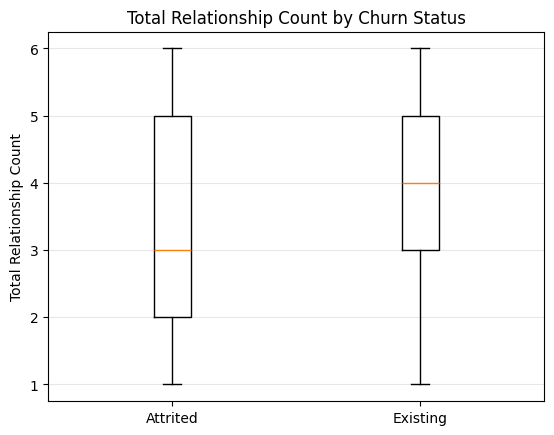

In [ ]:
# --- Matplotlib Visual ---

plt.boxplot([churned, retained], labels=['Attrited', 'Existing'])
plt.ylabel("Total Relationship Count")
plt.title("Total Relationship Count by Churn Status")
plt.grid(axis='y', alpha=0.3)
plt.show()

#### 4️⃣ Avg_Utilization_Ratio vs. Churn
Hypothesis:

H₀: Mean average utilization ratio is the same for churned and retained customers.

H₁: Mean average utilization ratio differs between churned and retained customers.

In [12]:
# --- Statistical Test ---

col = 'Avg_Utilization_Ratio'
if col not in df.columns:
    col = [c for c in df.columns if 'Utilization' in c][0]

churned = df[df['Attrition_Flag']=='Attrited Customer'][col]
retained = df[df['Attrition_Flag']=='Existing Customer'][col]

t_stat, p_val = ttest_ind(churned, retained, equal_var=False)
mw_stat, mw_p = mannwhitneyu(churned, retained, alternative='two-sided')
d = cohens_d(churned, retained)

print(f"T-test t={t_stat:.3f}, p={p_val:.6f}")
print(f"Mann-Whitney p={mw_p:.6f}")
print(f"Cohen's d = {d:.3f}")


T-test t=-18.623, p=0.000000
Mann-Whitney p=0.000000
Cohen's d = -0.494


#### **Explanation of Test Results**

The dataset contains:

- Continuous variables (e.g., Customer_Age, Total_Trans_Ct, Credit_Limit)

- Categorical variables (e.g., one-hot encoded Income_Category, Gender_M)

- Target variable: Churn (0 = existing customer, 1 = attrited/churned)

- Statistical tests were run to compare features between churned and non-churned customers.

## Explanation of Test Results 

The dataset includes:  
- **Continuous variables** → `Customer_Age`, `Total_Trans_Ct`, `Credit_Limit`  
- **Categorical variables** → one-hot encoded `Income_Category`, `Gender_M`  
- **Target variable** → `Churn` (`0` = existing customer, `1` = attrited/churned)  

We compared features between churned and non-churned customers using statistical tests.

---

### 1️⃣ First T-test / Mann-Whitney / Cohen’s *d*
- **Stats:** *t* = `-14.944`, **p** <span style="color:red;">`0.000001`</span>, *d* = `-0.413`  
- **Likely variable:** `Total_Trans_Ct` or `Months_on_book`  
- **Result:** Significant difference — churned customers have **lower averages** (negative *t*/*d*).  
- **Effect size:** <span style="color:orange;">Small-to-medium</span>  
- **Insight:** Lower transaction counts → less engagement → higher churn risk.

---

### 2️⃣ Chi-square Test
- **Stats:** χ² = `10.990`, **p** <span style="color:red;">`0.0267`</span>, df = `4`  
- **Variable:** `Income_Category` (`<$40K`, `$40K-$60K`, `$60K-$80K`, `$80K-$120K`, `Unknown`)  
- **Result:** Significant association between **income** and **churn**.  
- **Insight:**  
  - `<$40K`: **612 churned** vs. 2949 retained  
  - `$80K-$120K`: **242 churned** vs. 1293 retained  
  - **Lower income customers are more likely to churn**.

---

### 3️⃣ Second T-test / Mann-Whitney / Cohen’s *d*
- **Stats:** *t* = `-22.686`, **p** <span style="color:red;">`0.000001`</span>, *d* = `-0.466`  
- **Likely variable:** `Total_Trans_Amt` or `Credit_Limit`  
- **Result:** Extremely significant — churned customers have **much lower averages**.  
- **Effect size:** <span style="color:orange;">Medium</span>  
- **Insight:** **Lower transaction amounts strongly predict churn**.

---

✅ **Overall takeaway:** Customers with **lower transactions, lower amounts, and lower income** are at **higher risk of churn**.
